In [1]:
import numpy as np 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
### RESOURCES ###

# https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07
    # Winsorizing: This method involves setting the extreme values of an attribute to some specified value. For example, for a 90% Winsorization, the bottom 5% of values are set equal to the minimum value in the 5th percentile, while the upper 5% of values are set equal to the maximum value in the 95th percentile. This is more advanced than trimming where we just exclude the extreme values.
    #Log-Scale Transformation: This method is often used to reduce the variability of data including outlying observation. Here, the y value is changed to log(y). It’s often preferred when the response variable follows exponential distribution or is right-skewed.


In [3]:
dft=pd.read_csv('train.csv')

In [4]:
dft.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dft.isna().sum()[dft.isna().sum() > 80].index

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
df_train = dft.drop(columns=list(dft.isna().sum()[dft.isna().sum() > 80].index))

In [7]:
str_cols = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [8]:
df_train['Street'].unique()#[str_cols]

array(['Pave', 'Grvl'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df_train_copy = df_train.copy()
label_encoder = LabelEncoder()
for col in str_cols:
    df_train_copy[col] = label_encoder.fit_transform(df_train_copy[col])

In [172]:
df_train_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Y

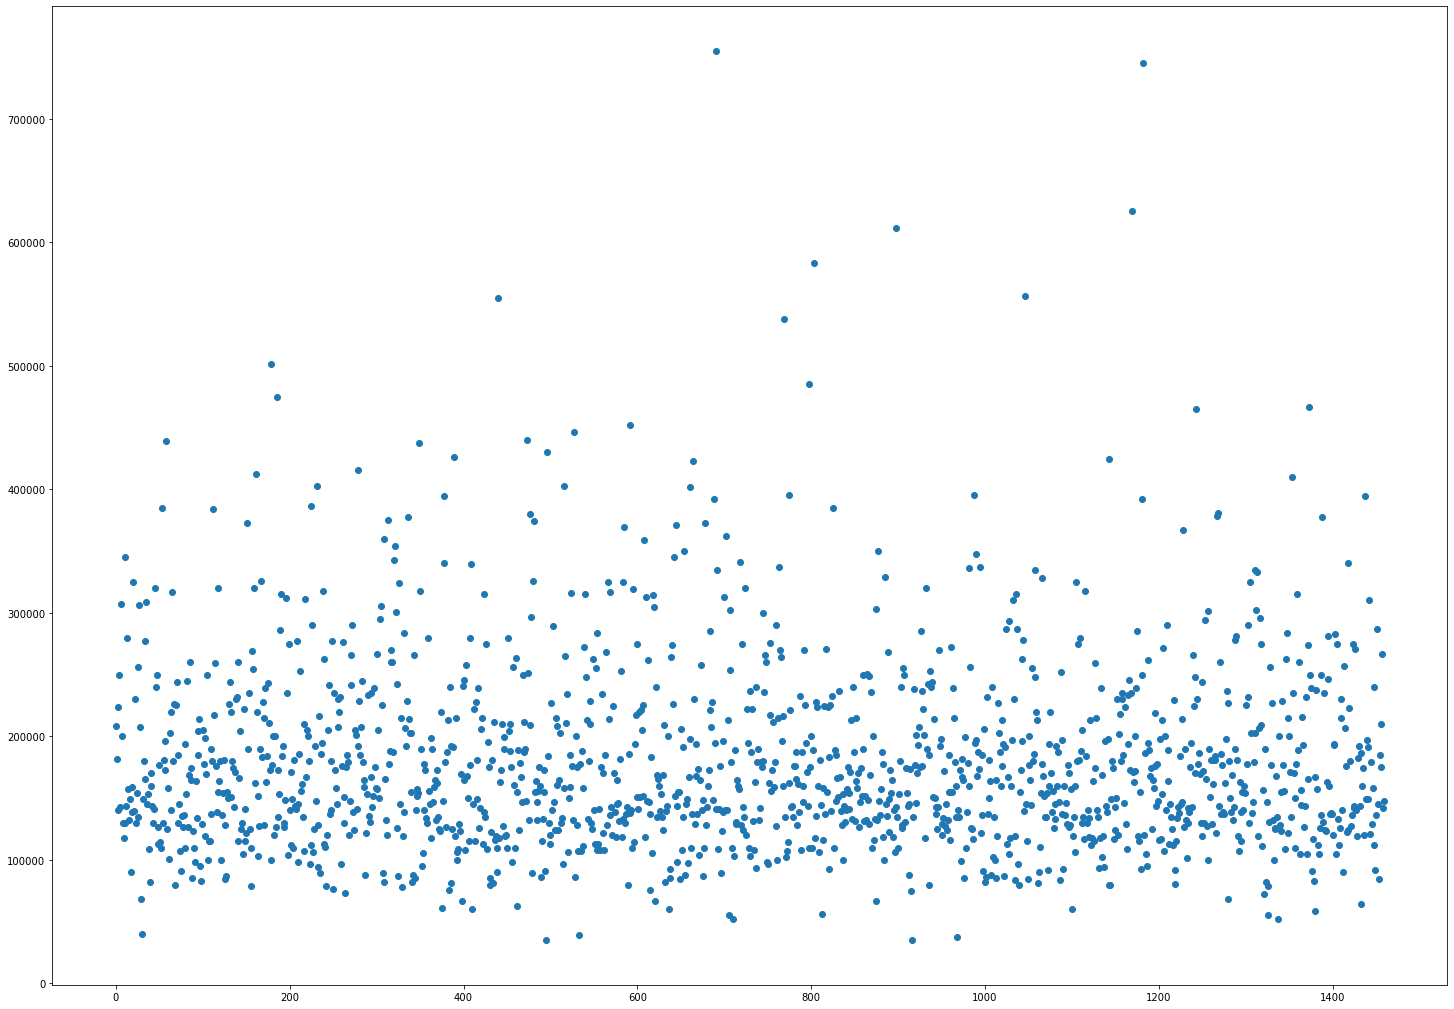

In [148]:
# Plot Sales Price
f, ax = plt.subplots(figsize=(25,18))
plt.scatter(x=df_train_copy.index,y=df_train_copy['SalePrice'])


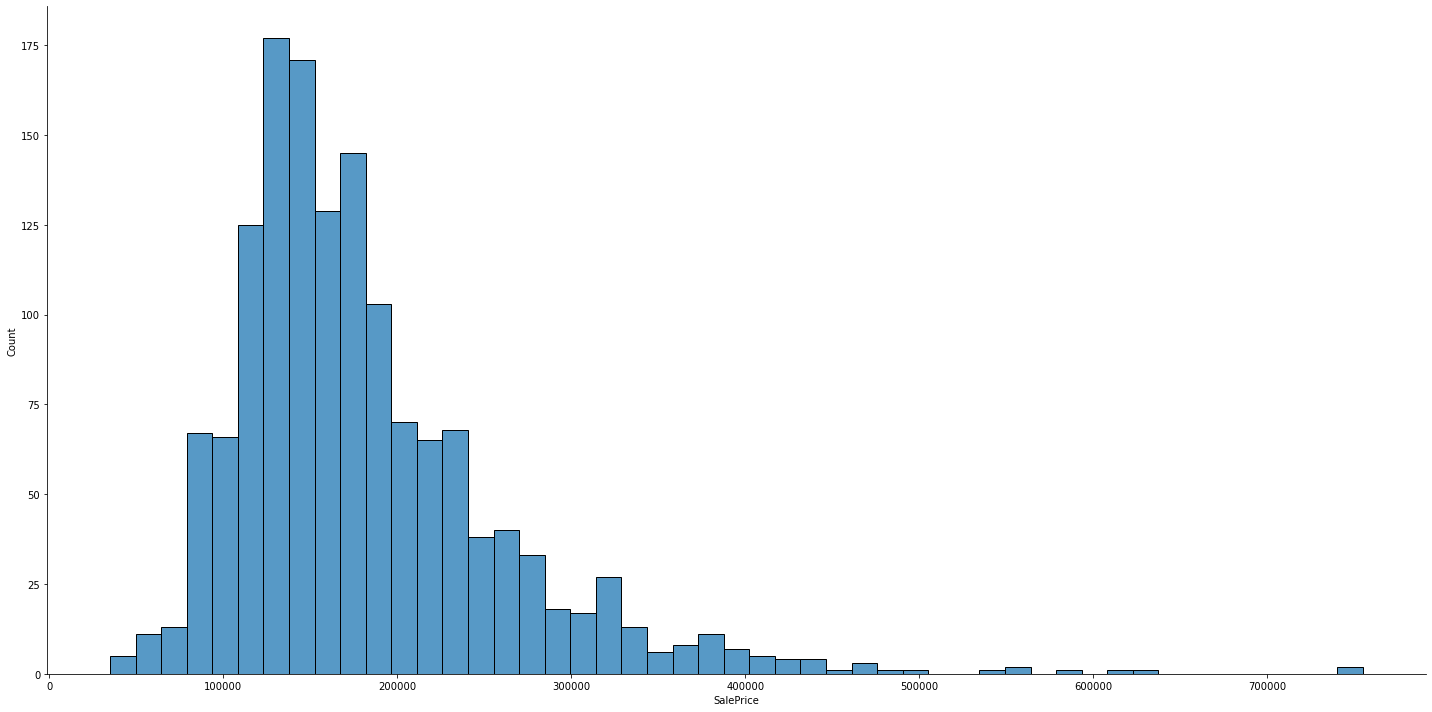

In [173]:
# Plot Distribution of Sales Price

sns.displot(df_train_copy['SalePrice'],height=10,aspect=2)

In [ ]:
# Prices are all over the place.. maybe remove outliers? 
# Answer: No, probably shouldnt remove outliers unless its a measurement error. Should only remove outliers where the correlation of the indepedent variable to the dependant variable is massively different from the average. See next plot

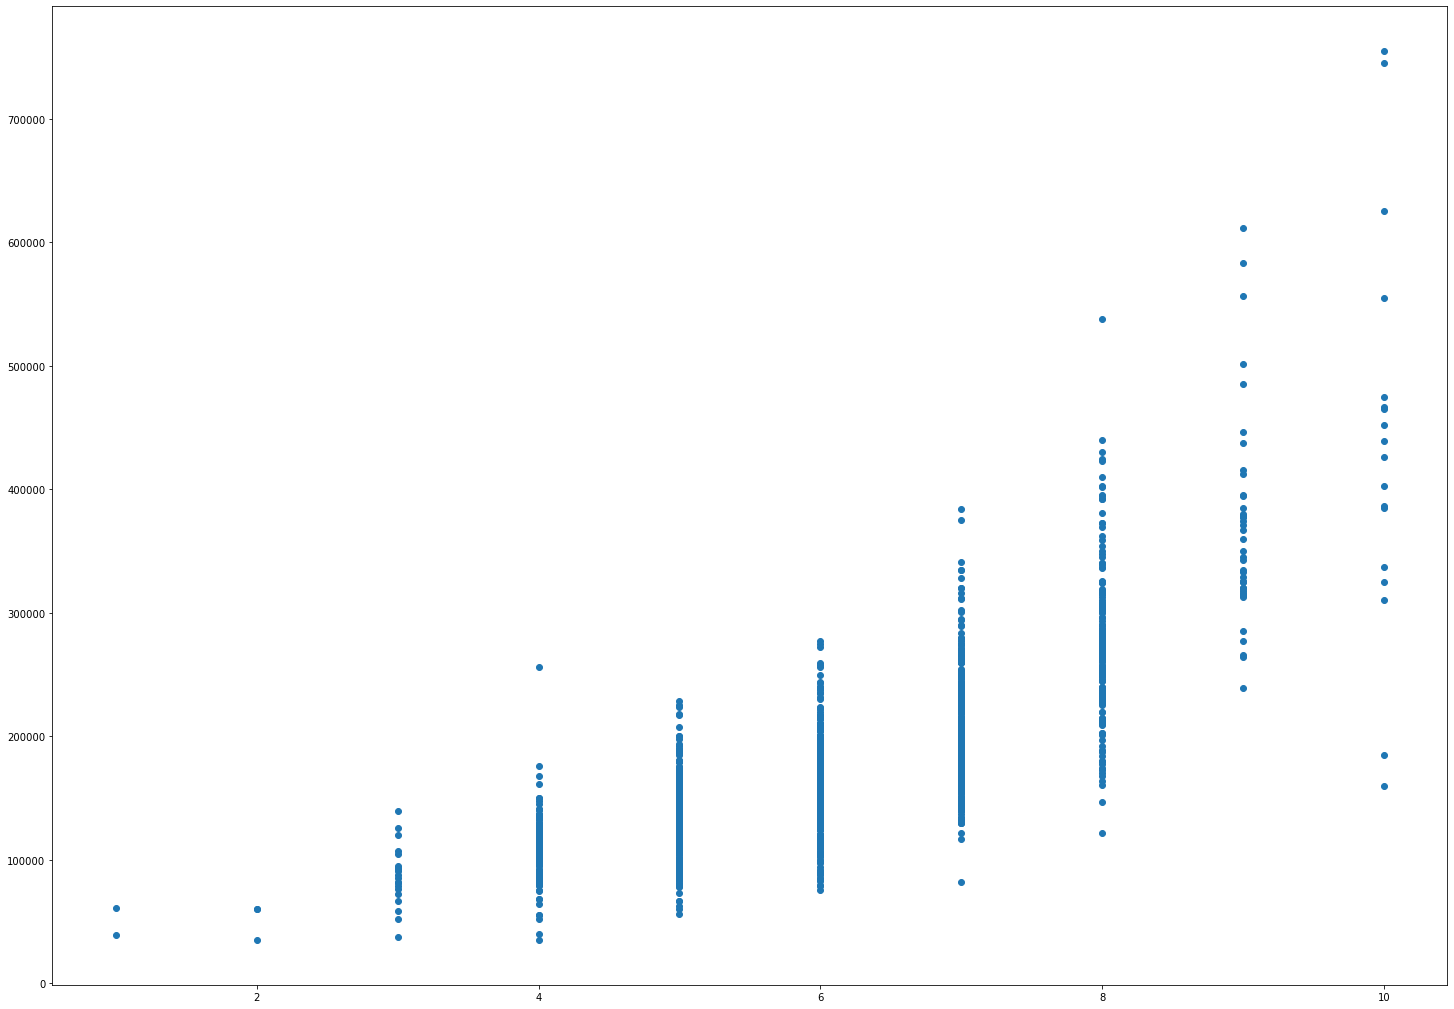

In [178]:
#Plot relation of OverQual to Sales Price
f, ax = plt.subplots(figsize=(25,18))
plt.scatter(x = df_train_copy['OverallQual'], y =df_train_copy['SalePrice'])

In [ ]:
 # The ratio of Overall Qual to Sales price seems reasonable, so no need to drop outliers on that

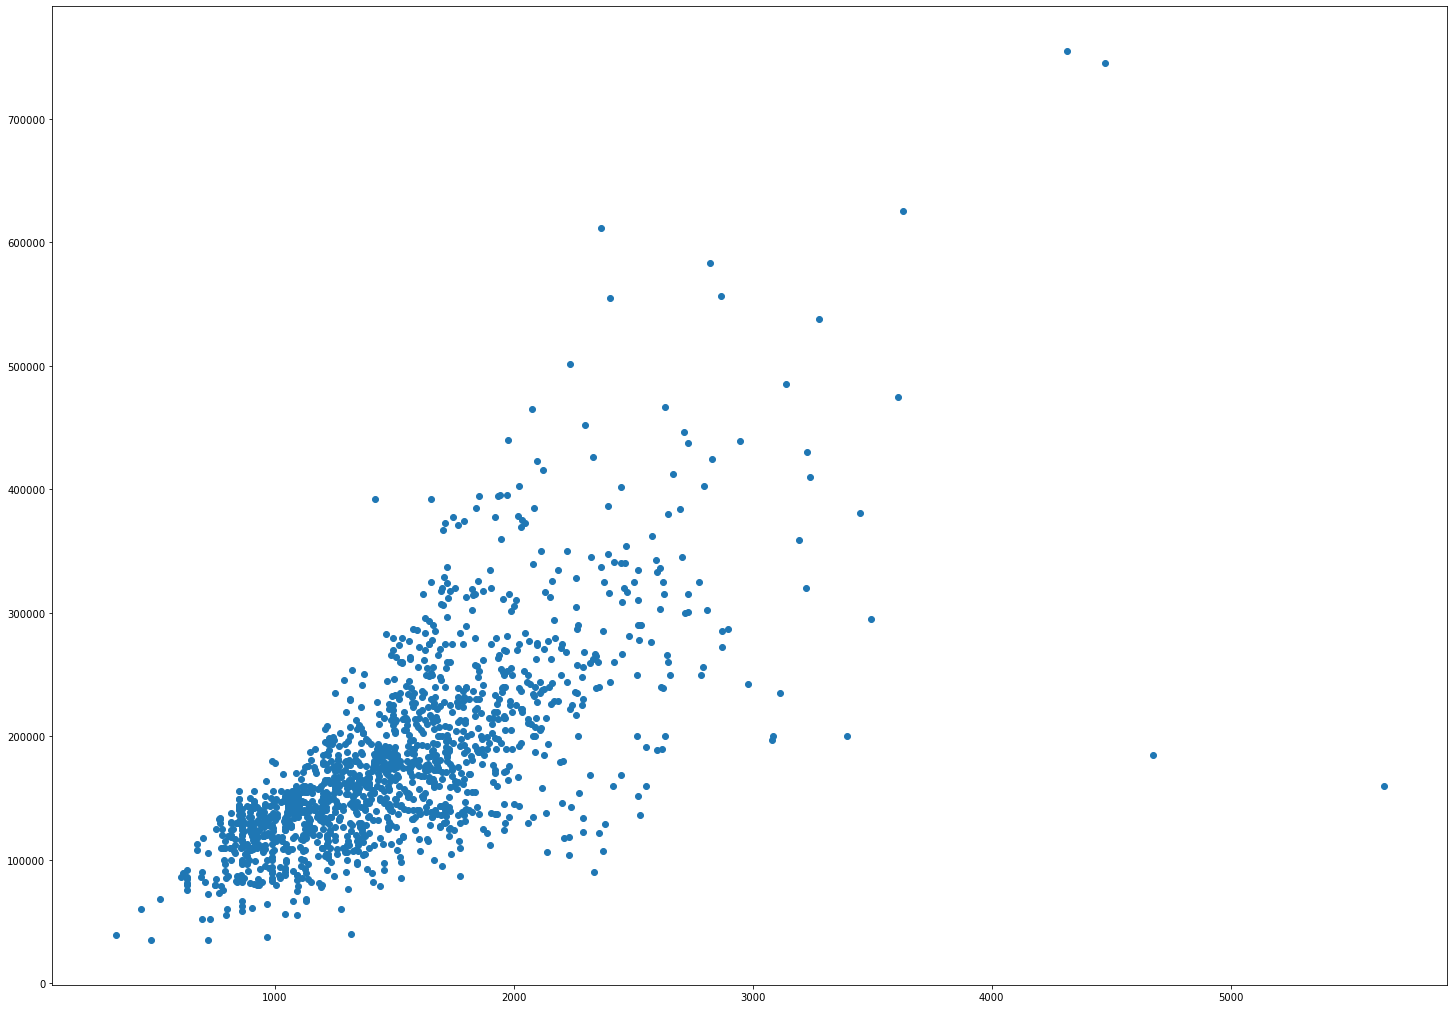

In [179]:
#Plot relation of OverQual to Sales Price
f, ax = plt.subplots(figsize=(25,18))
plt.scatter(x = df_train_copy['GrLivArea'], y =df_train_copy['SalePrice'])

In [ ]:
# A few significant outliers.. maybe drop the one on the far bottom right ?

In [94]:
# Try changing year built to age of house, by subtrating 2021 - year built

df_train_copy['Age_of_House'] = 2020 - df_train_copy['YearBuilt']

In [100]:
# df_train_copy['Age_of_House']

count    1460.000000
mean       48.732192
std        30.202904
min        10.000000
25%        20.000000
50%        47.000000
75%        66.000000
max       148.000000
Name: Age_of_House, dtype: float64

In [95]:
corrmat = df_train_copy.corr()

In [96]:
corrmat[(corrmat['SalePrice'] > .4) | (corrmat['SalePrice'] < -.2)].index

Index(['LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice', 'Age_of_House'],
      dtype='object')

In [97]:
df_train_copy_reduced = df_train_copy[list(corrmat[(corrmat['SalePrice'] > .4) | (corrmat['SalePrice'] < -.2)].index)]

<AxesSubplot:>

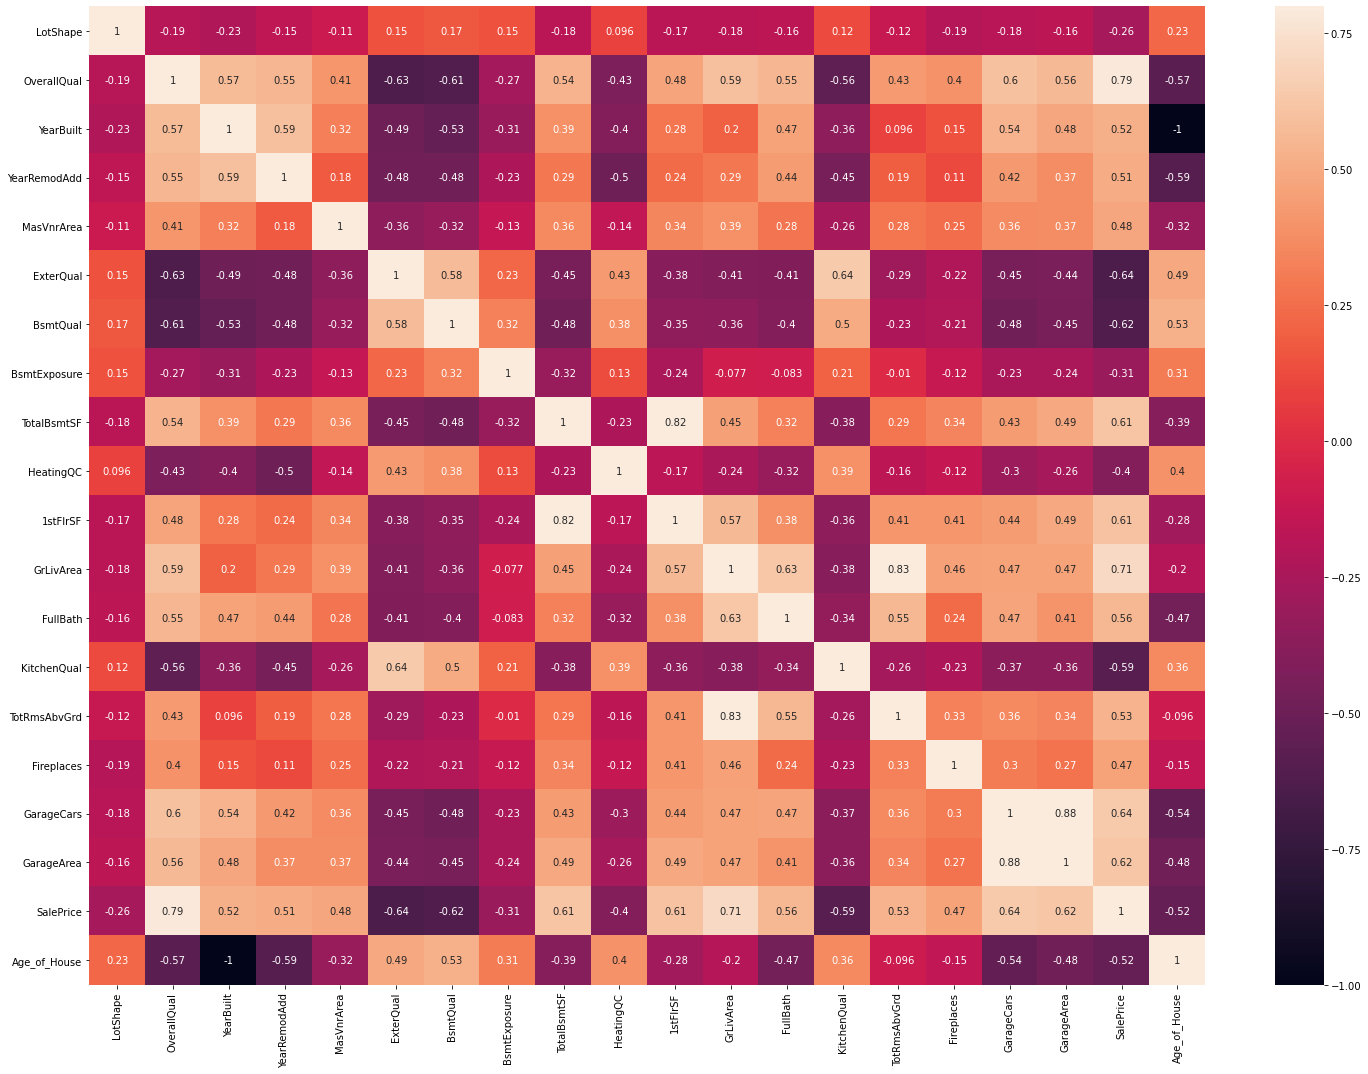

In [150]:
f,ax = plt.subplots(figsize=(25,18))
sns.heatmap(df_train_copy_reduced.corr(),vmax=.8,square =False,annot=True)

In [16]:
train  = df_train_copy_reduced.copy().drop(columns=['YearBuilt'])

In [114]:
vif_data = pd.DataFrame()
X = df_train_copy_reduced[['LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'Age_of_House']]
vif_data["feature"] = X.columns

In [115]:
X.drop(list(X[X['MasVnrArea'].isna() == True].index),inplace=True)

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [118]:
vif_data

,feature,VIF
0,LotShape,1.100666
1,OverallQual,3.250414
2,YearBuilt,17971.630827
3,YearRemodAdd,2.004441
4,MasVnrArea,1.364068
5,ExterQual,2.338904
6,BsmtQual,2.062577
7,BsmtExposure,1.225309
8,TotalBsmtSF,3.829956
9,HeatingQC,1.463334


In [17]:
###

In [18]:
train = df_train[list(corrmat[(corrmat['SalePrice'] > .4) | (corrmat['SalePrice'] < -.2)].index)]

In [119]:
train  = df_train_copy_reduced.copy().drop(columns=['YearBuilt'])

In [120]:
from scipy.stats import skew

In [121]:
#log transform the target:
# train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [122]:
train[skewed_feats] = np.log1p(train[skewed_feats])

In [123]:
#log transform skewed numeric features:
# numeric_feats = train.dtypes[train.dtypes != "object"].index

In [124]:
train = pd.get_dummies(train)

In [125]:
train = train.fillna(train.mean())

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [126]:
val_index_lst = []
for num in range(0,1460,5):
    val_index_lst.append(num)

In [127]:
df_val = train[train.index.isin(val_index_lst)]

In [128]:
df_train = train[~train.index.isin(df_val.index)]

In [131]:
df_train.drop(columns=['YearRemodAdd'],inplace=True)

In [135]:
df_train

,LotShape,OverallQual,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,Age_of_House
1,3,6,0.000000,3,2,1,7.141245,0,7.141245,7.141245,2,3,6,1,2,460,12.109016,44
2,0,7,5.093750,2,2,2,6.825460,0,6.825460,7.488294,2,2,6,1,2,608,12.317171,19
3,0,7,0.000000,3,3,3,6.629363,2,6.869014,7.448916,1,2,7,1,3,642,11.849405,105
4,0,8,5.860786,2,2,0,7.044033,0,7.044033,7.695758,2,2,9,1,3,836,12.429220,20
6,3,8,5.231109,2,0,0,7.430707,0,7.435438,7.435438,2,2,7,1,2,636,12.634606,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,7,0.000000,2,2,3,7.108244,0,7.108244,7.108244,2,2,6,0,2,400,12.128117,16
1456,3,6,4.787492,3,2,3,7.341484,4,7.637234,7.637234,2,3,7,2,2,500,12.254868,42
1457,3,7,0.000000,0,3,3,7.050123,0,7.080868,7.758333,2,2,9,2,1,252,12.493133,79
1458,3,5,0.000000,3,3,2,6.983790,2,6.983790,6.983790,1,2,5,0,1,240,11.864469,70


In [133]:
df_val.drop(columns=['YearRemodAdd'],inplace=True)

In [134]:
df_val.columns

Index(['LotShape', 'OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'SalePrice', 'Age_of_House'],
      dtype='object')

In [136]:
val_X = df_val[['LotShape', 'OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'Age_of_House']]
val_y = df_val['SalePrice']

In [137]:
train_x = df_train[['LotShape', 'OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'Age_of_House']]

train_y = df_train['SalePrice']

In [138]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model,x,y):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [139]:
import xgboost as xgb

In [140]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
preds = np.expm1(model_xgb.predict(val_X))

In [142]:
rmse_cv(model_xgb,train_x,train_y)

array([0.14195418, 0.17807704, 0.17312047, 0.14715151, 0.15857226])

In [143]:
 df = pd.DataFrame({'Predictions':preds,'Actual':np.expm1(val_y)})

In [144]:
### Analyze model results ###

In [145]:
df['Error'] = df['Actual'] - df['Predictions'] 

In [146]:
df['Error %'] = (df['Actual'] - df['Predictions'])/df['Actual']

In [147]:
#new results... seem to be slightly better..
df.describe()

,Predictions,Actual,Error,Error %
count,292.000000,292.000000,292.000000,292.000000
mean,174198.406250,178146.130137,3947.737612,-0.002851
std,68438.523438,73452.215997,29589.154002,0.201353
min,39633.406250,34900.000000,-77340.781250,-1.514865
25%,127352.685547,128875.000000,-10961.671875,-0.067835
50%,157957.164062,166950.000000,3052.554688,0.018672
75%,204882.140625,209375.000000,14349.304688,0.093829
max,423188.750000,555000.000000,263464.625000,0.474711


In [92]:
#old results
df.describe()

,Predictions,Actual,Error,Error %
count,292.000000,292.000000,292.000000,292.000000
mean,175070.484375,178146.130137,3075.693373,-0.002587
std,70140.210938,73452.215997,29464.452524,0.201034
min,34881.070312,34900.000000,-81134.312500,-1.548774
25%,127612.412109,128875.000000,-11485.238281,-0.066524
50%,158765.929688,166950.000000,3663.722656,0.024256
75%,209468.320312,209375.000000,14720.099609,0.092382
max,402044.937500,555000.000000,252266.281250,0.550952


In [53]:
df[(df['Error %'] > .2) | (df['Error %'] < -.2)]

,Predictions,Actual,Error,Error %
30,101950.968750,40000.0,-61950.968750,-1.548774
70,324880.718750,244000.0,-80880.718750,-0.331478
175,184264.703125,243000.0,58735.296875,0.241709
185,295201.281250,475000.0,179798.718750,0.378524
250,97181.453125,76500.0,-20681.453125,-0.270346
325,110308.976562,87000.0,-23308.976563,-0.267919
375,79830.843750,61000.0,-18830.843750,-0.308702
390,88344.742188,119000.0,30655.257812,0.257607
410,141134.312500,60000.0,-81134.312500,-1.352239
440,302733.718750,555000.0,252266.281250,0.454534


In [54]:
high_error_index = list(df[(df['Error %'] > .2) | (df['Error %'] < -.2)].index)

In [57]:
val_X[val_X.index.isin(high_error_index)].describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5.166667,1948.857143,1973.857143,1.257953,6.398388,6.951828,7.177760,1.404762,6.166667,0.571429,...,0.571429,0.238095,0.119048,0.142857,0.023810,0.476190,0.071429,0.142857,0.190476,0.595238
std,1.949567,31.200822,22.660346,2.307454,1.853420,0.431828,0.414309,0.543679,1.846773,0.800697,...,0.500870,0.431081,0.327770,0.354169,0.154303,0.505487,0.260661,0.354169,0.397437,0.496796
min,1.000000,1892.000000,1950.000000,0.000000,0.000000,5.921578,6.084499,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1920.500000,1950.000000,0.000000,6.580639,6.683041,6.834330,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1950.500000,1971.000000,0.000000,6.822724,6.859580,7.195124,1.000000,6.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,1971.500000,1998.750000,0.000000,7.137345,7.304159,7.451364,2.000000,7.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,2008.000000,2008.000000,7.017506,8.037543,7.784473,8.191186,2.000000,12.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
val_X.describe()
# Variables with different .describe() stats: MasVnrArea

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,BsmtExposure_No,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,6.068493,1970.952055,1983.482877,2.270067,6.756578,6.988255,7.262668,1.602740,6.479452,0.589041,...,0.674658,0.452055,0.041096,0.171233,0.003425,0.332192,0.075342,0.037671,0.366438,0.520548
std,1.465092,30.022862,20.646502,2.668933,1.118721,0.325513,0.321610,0.549657,1.675451,0.670141,...,0.469307,0.498550,0.198853,0.377359,0.058521,0.471808,0.264396,0.190727,0.482658,0.500435
min,1.000000,1880.000000,1950.000000,0.000000,0.000000,5.921578,6.084499,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1952.000000,1965.750000,0.000000,6.685549,6.760989,7.031297,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1973.000000,1991.000000,0.000000,6.897697,6.963662,7.274133,2.000000,6.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.000000,1999.250000,2003.000000,5.288229,7.157538,7.220730,7.478170,2.000000,7.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,10.000000,2009.000000,2010.000000,7.029973,8.037543,7.784473,8.191186,3.000000,14.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


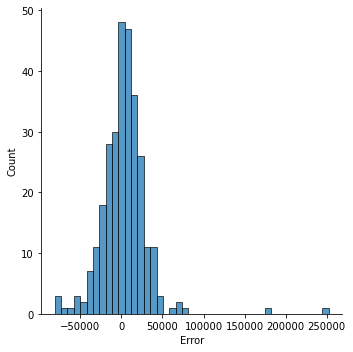

In [46]:
sns.displot(df['Error'])

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'ExterQual_Ex', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'HeatingQC_Ex', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [68]:
vif_data = pd.DataFrame()
X = train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea']]
vif_data["feature"] = X.columns

In [69]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [76]:
X['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [70]:
vif_data

,feature,VIF
0,OverallQual,46.943366
1,YearBuilt,8263.571626
2,YearRemodAdd,9648.484311
3,MasVnrArea,2.236022
4,TotalBsmtSF,42.831289
5,1stFlrSF,823.142575
6,GrLivArea,2297.366438
7,FullBath,17.775219
8,TotRmsAbvGrd,57.670458
9,Fireplaces,2.705216


In [ ]:
#################

In [73]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [74]:
for col in ['YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']:
    train[col] = np.log1p(train[col])

In [75]:
train

,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,SalesPrice
0,3,7,2.152099,2.152099,1.837880,2,2,3,2.048136,0,2.048136,2.133555,2,2,8,0,2,1.988983,12.247699,12.247699
1,3,6,2.150521,2.150521,0.000000,3,2,1,2.096943,0,2.096943,2.096943,2,3,6,1,2,1.964788,12.109016,12.109016
2,0,7,2.151983,2.152041,1.807264,2,2,2,2.057383,0,2.057383,2.138688,2,2,6,1,2,2.003076,12.317171,12.317171
3,0,7,2.146866,2.150167,0.000000,3,3,3,2.032004,2,2.062933,2.134038,1,2,7,1,3,2.010379,11.849405,11.849405
4,0,8,2.151925,2.151925,1.925822,2,2,0,2.084931,0,2.084931,2.162835,2,2,9,1,3,2.045086,12.429220,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,6,2.151867,2.151925,0.000000,3,2,3,2.061871,0,2.061871,2.129102,2,3,7,1,2,1.964788,12.072547,12.072547
1456,3,6,2.150639,2.151226,1.755699,3,2,3,2.121241,4,2.156082,2.156082,2,3,7,2,2,1.976385,12.254868,12.254868
1457,3,7,2.148440,2.152273,0.000000,0,3,3,2.085687,0,2.089499,2.170006,2,2,9,2,1,1.876926,12.493133,12.493133
1458,3,5,2.148979,2.151693,0.000000,3,3,2,2.077413,2,2.077413,2.077413,1,2,5,0,1,1.869461,11.864469,11.864469


In [76]:
1460/292

5.0

In [77]:
import xgboost as xgb

In [78]:
val_index_lst = []
for num in range(0,1460,5):
    val_index_lst.append(num)

In [79]:
df_val = train[train.index.isin(val_index_lst)]

In [82]:
# df_val.drop(columns=['SalePrice'],inplace=True)

In [83]:
X_Val = df_val[['LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea']]
Y_Val = df_val['SalesPrice']

In [84]:
df_train = train[~train.index.isin(df_val.index)]

In [86]:
df_train.drop(columns=['SalePrice'],inplace=True)

In [87]:
X_Train = df_train[['LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea']]
Y_Train = df_train['SalesPrice']

In [89]:
Y_Train

1       12.109016
2       12.317171
3       11.849405
4       12.429220
6       12.634606
          ...    
1454    12.128117
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalesPrice, Length: 1168, dtype: float64

In [90]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_Train,Y_Train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
preds = np.expm1(model_xgb.predict(X_Val))

In [92]:
 df = pd.DataFrame({'Predictions':preds,'Actual':np.expm1(Y_Val)})

In [93]:
df['Pct Diff'] = abs((df['Predictions'] - df['Actual']) / df['Actual'])

In [94]:
df.describe()

,Predictions,Actual,Pct Diff
count,292.000000,292.000000,292.000000
mean,173979.609375,178146.130137,0.119994
std,69228.093750,73452.215997,0.156348
min,32957.097656,34900.000000,0.001547
25%,127408.341797,128875.000000,0.040553
50%,160592.804688,166950.000000,0.081058
75%,206766.925781,209375.000000,0.143664
max,424835.343750,555000.000000,1.510489


In [72]:
X_Train

,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
1,3,6,7.589336,7.589336,0.000000,3,2,1,7.141245,0,7.141245,7.141245,2,3,6,1,2,6.133398
2,0,7,7.601902,7.602401,5.093750,2,2,2,6.825460,0,6.825460,7.488294,2,2,6,1,2,6.411818
3,0,7,7.557995,7.586296,0.000000,3,3,3,6.629363,2,6.869014,7.448916,1,2,7,1,3,6.466145
4,0,8,7.601402,7.601402,5.860786,2,2,0,7.044033,0,7.044033,7.695758,2,2,9,1,3,6.729824
6,3,8,7.603399,7.603898,5.231109,2,0,0,7.430707,0,7.435438,7.435438,2,2,7,1,2,6.456770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,7,7.603399,7.603898,0.000000,2,2,3,7.108244,0,7.108244,7.108244,2,2,6,0,2,5.993961
1456,3,6,7.590347,7.595387,4.787492,3,2,3,7.341484,4,7.637234,7.637234,2,3,7,2,2,6.216606
1457,3,7,7.571474,7.604396,0.000000,0,3,3,7.050123,0,7.080868,7.758333,2,2,9,2,1,5.533389
1458,3,5,7.576097,7.599401,0.000000,3,3,2,6.983790,2,6.983790,6.983790,1,2,5,0,1,5.484797
